# Scraping Data from Imdb (STEP 1)

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating an empty list to add our data
main_list = []

# Start
start = 1

# Count
count = 250         # Max value is 250

In [3]:
URL_MOVIES = f"https://www.imdb.com/search/title/?title_type=feature&start={start}&count={count}"
URL_SERIES = f"https://www.imdb.com/search/title/?title_type=tv_series&start={start}&count={count}"
URL_UPCOMING = "https://www.imdb.com/calendar/?ref_=rlm&region=CA&type=MOVIE"

In [4]:
# How many data you need
total_data = 10000

# Total loops
loop = total_data//count           # we see 50 data on 1 page at a time

print(loop)

40


In [9]:
total_data

10000

In [6]:
for i in range(loop//2):
    URL_MOVIES = f"https://www.imdb.com/search/title/?title_type=feature&start={start+(i*count)}&count={count}"
    source = requests.get(URL_MOVIES).text
    soup = BeautifulSoup(source, 'lxml')
    article = soup.findAll('div', class_='lister-item-content')
    main_list += article
    print(i)
for i in range(loop//2):
    URL_SERIES = f"https://www.imdb.com/search/title/?title_type=tv_series&start={start+(i*count)}&count={count}"
    source = requests.get(URL_SERIES).text
    soup = BeautifulSoup(source, 'lxml')
    article = soup.findAll('div', class_='lister-item-content')
    main_list += article
    print((loop//2)+i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


## -----------------

In [7]:
# print(main_list[2500].h3.a.text)
print(main_list[4].h3.a.text)

The Little Mermaid


In [21]:
# Some Testing

# print(main_list[2500].findAll('p')[3].span.text == 'Votes:')
# print(main_list[2500].findAll('p')[3].findAll('span')[1].text)
# print(main_list[2500].findAll('p'))
# print(main_list[4])

All movies have director + stars, whereas series only have stars info

In [13]:
# print(main_list[4])
# print(main_list[4].findAll('p')[3])


# temp = ''
# for i in main_list[4].findAll('p')[2].findAll('a')[1:]:
#     temp += i.text + ", "

# print(temp[:-2])
main_list[0].h3.find('span', class_= 'lister-item-year text-muted unbold').text

# print(main_list[4].findAll('p')[2].findAll('a')[1:])                                            # For cast
# print(main_list[4].findAll('p')[2].findAll())
# print(main_list[4].div.div.strong.text)                                                         # Rating
# print(main_list[4].findAll('p')[0].findAll('span'))                                
# print(main_list[4].findAll('p')[0].find('span', class_='genre').text)                           # Genre                          
# print(main_list[4].findAll('p')[0].find('span', class_='runtime').text)                         # Runtime                          
# print(main_list[1].findAll('p')[0].find('span', class_= 'certificate').text)                    # Certificate
# print((main_list[4].findAll('p')[1].text))                                                      # Summary of the move/series
# print((main_list[4].findAll('p')[2]))
# print((main_list[4].findAll('p')[3]))                                                           # For Gross and Votes
# print(main_list[4].h3.a.text)                                                                   # Name of the movie/series
# print(main_list[4].h3.span.text)                                                                # Ranking in the popularity list
# print(main_list[4].h3.find('span', class_= 'lister-item-year text-muted unbold').text)          # Year
# print(main_list[4].findAll('p', class_= 'text-muted'))

'(2022)'

## -----------------

## Raw data collected

In [14]:
# Making list for the information to be extracted
popularity_ranking = []
name = []
rating = []
summary = []
votes = []
cast = []
certificate = []
runtime = []
genre = []
year = []
director = []
gross = []
type_of_content = []

In [15]:
for i in range(len(main_list)):
    temp = ''
    try:
        popularity_ranking.append(main_list[i].h3.span.text)
        name.append(main_list[i].h3.a.text)
        certificate.append(main_list[i].findAll('p')[0].find('span', class_= 'certificate').text)
        genre.append(main_list[i].findAll('p')[0].find('span', class_='genre').text)
        rating.append(main_list[i].div.div.strong.text)
        year.append(main_list[i].h3.find('span', class_= 'lister-item-year text-muted unbold').text)
        runtime.append(main_list[i].findAll('p')[0].find('span', class_='runtime').text)
        summary.append(main_list[i].findAll('p')[1].text)
        votes.append(main_list[i].findAll('p')[3].findAll('span')[1].text)
        gross.append(main_list[i].findAll('p')[3].findAll('span')[4].text)

        if i < (total_data//2):                        # It's a movie
            type_of_content.append('Movie')
            director.append(main_list[i].findAll('p')[2].findAll('a')[0].text)
            for casting in main_list[i].findAll('p')[2].findAll('a')[1:]:
                temp += casting.text + ", "
            cast.append(temp[:2])
        else:
            type_of_content.append('Series')
            director.append('')
            for casting in main_list[i].findAll('p')[2].findAll('a'):
                temp += casting.text + ", "
            cast.append(temp[:2])

    except:
        pass

In [16]:
print("Popularity ranking: ", len(popularity_ranking))
print("Name: ", len(name))
print("Certificate: ", len(certificate))
print("Genre: ", len(genre))
print("Year: ", len(year))
print("Rating: ", len(rating))
print("Summary: ", len(summary))
print("Votes: ", len(votes))
print("Runtime: ", len(runtime))
print("Case: ", len(cast))
print("Director: ", len(director))
print("Gross: ", len(gross))
print("Types of Content: ", len(type_of_content))

Popularity ranking:  10000
Name:  10000
Certificate:  6900
Genre:  6900
Year:  6857
Rating:  6857
Summary:  6755
Votes:  6754
Runtime:  6755
Case:  3437
Director:  3437
Gross:  3437
Types of Content:  3437


# Data Wrangling (STEP 2)

## All of the tags below has no missing values so we can extract the data easily 

In [36]:
# Making list for the information to be extracted
popularity_ranking = []
name = []
rating = []
summary = []
votes = []
cast = []
certificate = []
runtime = []
genre = []
year = []
director = []
gross = []
type_of_content = []

In [37]:
for i in range(len(main_list)):
    popularity_ranking.append(main_list[i].h3.span.text)
    name.append(main_list[i].h3.a.text)
    year.append(main_list[i].h3.find('span', class_= 'lister-item-year text-muted unbold').text)
    summary.append(main_list[i].findAll('p')[1].text)

### Tags below has missing values which will throw error; so we are filling those values with '' so we have exact same data size

In [38]:
# Director + Type of Content
for i in range(len(main_list)):
    try:
        if i < total_data//2:                                        # It's a movie
            type_of_content.append('Movie')
            director.append(main_list[i].findAll('p')[2].findAll('a')[0].text)
        else:
            type_of_content.append('Series')
            director.append(np.NaN)
    except IndexError:
        director.append(np.NaN)

In [39]:
# Cast
for i in range(len(main_list)):  
    temp = ''
    try:  
        if i < total_data//2:                                        # It's a movie
            for casting in main_list[i].findAll('p')[2].findAll('a')[1:]:
                temp += casting.text + ", "
            cast.append(temp[:-2])
        else:
            for casting in main_list[i].findAll('p')[2].findAll('a'):
                temp += casting.text + ", "
            cast.append(temp[:-2])
    except IndexError:
        cast.append(np.NaN)

In [40]:
# Certificate
for i in range(len(main_list)):
    try:
        certificate.append(main_list[i].findAll('p')[0].find('span', class_= 'certificate').text)
    except AttributeError:
        certificate.append(np.NaN)

In [41]:
# Rating
for i in range(len(main_list)):
    try:
        rating.append(main_list[i].div.div.strong.text)
    except AttributeError:
        rating.append(np.NaN)

In [42]:
# Runtime
for i in range(len(main_list)):
    try:
        runtime.append(main_list[i].findAll('p')[0].find('span', class_='runtime').text)
    except AttributeError:
        runtime.append('Upcoming')

In [43]:
# Votes
for i in range(len(main_list)):
    try:
        votes.append(main_list[i].findAll('p')[3].findAll('span')[1].text)
    except IndexError:
        votes.append('Upcoming')

In [44]:
# Genre
for i in range(len(main_list)):
    try:
        genre.append(main_list[i].findAll('p')[0].find('span', class_='genre').text)
    except AttributeError:
        genre.append(np.NaN)

In [45]:
# Gross
for i in range(len(main_list)):
    try:
        gross.append(main_list[i].findAll('p')[3].findAll('span')[4].text)
    except IndexError:
        gross.append(np.NaN)

### Values

In [46]:
print("Popularity ranking: ", len(popularity_ranking))
print("Name: ", len(name))
print("Certificate: ", len(certificate))
print("Genre: ", len(genre))
print("Year: ", len(year))
print("Rating: ", len(rating))
print("Summary: ", len(summary))
print("Votes: ", len(votes))
print("Runtime: ", len(runtime))
print("Case: ", len(cast))
print("Director: ", len(director))
print("Gross: ", len(gross))
print("Types of Content: ", len(type_of_content))

Popularity ranking:  10000
Name:  10000
Certificate:  10000
Genre:  10000
Year:  10000
Rating:  10000
Summary:  10000
Votes:  10000
Runtime:  10000
Case:  10000
Director:  10000
Gross:  10000
Types of Content:  10000


## Creating Database

In [79]:
dictonary = {"Popularity Ranking" : popularity_ranking,
             "Name" : name,
             "Year" : year,
             "Certificate" : certificate,
             "Runtime" : runtime,
             "Genre" : genre,
             "Rating" : rating,
             "Summary" : summary, 
             "Director" : director,
             "Stars" : cast,
             "Votes" : votes,
             "Gross" : gross,
             "Type of Content" : type_of_content}
db = pd.DataFrame(dictonary, columns= dictonary.keys())

In [80]:
(db.tail(10))

,Popularity Ranking,Name,Year,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
9990,"4,991.",Power Rangers DinoThunder,(2004),NaN,30 min,"\nAction, Adventure, Sci-Fi",6.8,\nA team of unlikely personalities join forces...,NaN,"James Napier Robertson, Kevin Duhaney, Emma La...","3,376",NaN,Series
9991,"4,992.",Cal Fire,(2021– ),NaN,Upcoming,\nReality-TV,8.1,\nFirst-hand look at some of California's most...,NaN,,48,NaN,Series
9992,"4,993.",The Doris Day Show,(1968–1973),NaN,30 min,\nComedy,7.2,\nAfter spending most of her life in big citie...,NaN,"Doris Day, Philip Brown, Todd Starke, Denver Pyle",783,NaN,Series
9993,"4,994.",Chosen,(2022),TV-MA,41 min,"\nDrama, Mystery, Sci-Fi",4.6,\nA teenager finds her world turned upside dow...,NaN,"Malaika Berenth Mosendane, Andrea Heick Gadebe...","1,481",NaN,Series
9994,"4,995.",Adult Wednesday Addams,(2013–2015),NaN,20 min,\nComedy,8.4,"\nThe chronicles of Wednesday, from ""The Addam...",NaN,"Melissa Hunter, Hunter Cope, Megan Rosati, Jes...",681,NaN,Series
9995,"4,996.",MMC,(1989–1995),NaN,30 min,"\nFamily, Music",7.2,\nReboot of the 1950's Mickey Mouse Club featu...,NaN,"Chasen Hampton, Josh Ackerman, Lindsey Alley, ...",457,NaN,Series
9996,"4,997.",The Chef Show,(2019–2020),TV-MA,30 min,\nDocumentary,8.2,"\nWriter, director and food enthusiast Jon Fav...",NaN,"Jon Favreau, Roy Choi, Aaron Franklin, Andrew Rea","5,334",NaN,Series
9997,"4,998.",The Ultimatum: Marry or Move On,(2022– ),TV-MA,60 min,\nReality-TV,5.5,\nGet hitched or call it quits? Couples put th...,NaN,"Zay Wilson, April Marie, Rae Williams, Madlyn ...","2,176",NaN,Series
9998,"4,999.",Kung Fu Panda: The Paws of Destiny,(2018–2019),NaN,24 min,"\nAnimation, Action, Adventure",7.4,"\nAs the Dragon Master, Po has endured his fai...",NaN,"Laya DeLeon Hayes, Makana Say, Gunnar Sizemore...","1,232",NaN,Series
9999,"5,000.",La Unidad,(2020– ),NaN,Upcoming,"\nAction, Adventure, Crime",7.3,\nA secret unit of cops is assembled to stop a...,NaN,"Nathalie Poza, Michel Noher, Marian Álvarez, R...","1,552",NaN,Series


In [81]:
db.isna().sum()

Popularity Ranking       0
Name                     0
Year                     0
Certificate           3100
Runtime                  0
Genre                    4
Rating                 350
Summary                  0
Director              5001
Stars                    0
Votes                    0
Gross                 6501
Type of Content          0
dtype: int64

### Cleaning some values

Year value: (formating and some values that are filled with wrong data)

In [82]:
temp = []
for i in year:
    if i == "":
        temp.append(np.NaN)
    else:
        temp.append(re.findall('\d+.*', i))

In [83]:
temp_2 = []
for i in range(len(temp)):
    if type(temp[i]) != float and temp[i] != []:
        temp_2.append(temp[i][0][:-1])
    else:
        temp_2.append(np.NaN)

In [84]:
db['Year'] = temp_2

Genre:

In [85]:
temp = genre.copy()
temp_2 = []
for i in temp:
    try:
        x = i[1:]
        temp_2.append(x.rstrip())
    except:
        temp_2.append(np.NaN)

In [86]:
db['Genre'] = temp_2

Summary:

In [87]:
temp = summary.copy()
temp_2 = []
for i in temp:
    x = i[1:]
    temp_2.append(x)

In [88]:
db['Summary'] = temp_2

Popularity Ranking:

In [89]:
temp = popularity_ranking.copy()
temp_2 = []
for i in temp:
    x = int(re.sub(r'[^\d]', '', i))
    temp_2.append(x)

In [90]:
db['Popularity Ranking'] = temp_2

### Removing some NaN values

In [91]:
db.loc[db["Runtime"] == 'Upcoming', "Certificate"] = 'Upcoming'
db.dropna(subset= ['Certificate', 'Genre'], inplace= True)

In [92]:
db.head(10)

,Popularity Ranking,Name,Year,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Everything Everywhere All at Once,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","400,779",$72.86M,Movie
1,2,Scream VI,2023,14A,122 min,"Horror, Mystery, Thriller",7.2,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","33,036",NaN,Movie
2,3,The Whale,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","109,463",NaN,Movie
3,4,Luther: The Fallen Sun,2023,14A,129 min,"Crime, Drama, Mystery",6.4,Brilliant but disgraced detective John Luther ...,Jamie Payne,"Idris Elba, Cynthia Erivo, Andy Serkis, Dermot...","32,754",NaN,Movie
4,5,The Little Mermaid,2023,Upcoming,Upcoming,"Adventure, Family, Fantasy",NaN,A young mermaid makes a deal with a sea witch ...,Rob Marshall,"Halle Bailey, Jonah Hauer-King, Melissa McCart...",Upcoming,NaN,Movie
5,6,Cocaine Bear,2023,18A,95 min,"Comedy, Thriller",6.1,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","39,288",NaN,Movie
6,7,Shazam! Fury of the Gods,2023,PG,130 min,"Action, Adventure, Comedy",6.6,The film continues the story of teenage Billy ...,David F. Sandberg,"Zachary Levi, Asher Angel, Jack Dylan Grazer, ...","21,285",NaN,Movie
7,8,Im Westen nichts Neues,2022,14A,148 min,"Action, Drama, War",7.8,A young German soldier's terrifying experience...,Edward Berger,"Felix Kammerer, Albrecht Schuch, Aaron Hilmer,...","182,055",NaN,Movie
8,9,The Banshees of Inisherin,2022,14A,114 min,"Comedy, Drama",7.7,Two lifelong friends find themselves at an imp...,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","180,383",NaN,Movie
9,10,Triangle of Sadness,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","112,988",NaN,Movie


In [93]:
db.loc[db["Runtime"] == 'Upcoming', "Rating"] = 'Upcoming'
db.dropna(subset= ['Rating', 'Year'], inplace= True)
print(db.shape)

(7318, 13)


In [95]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7318 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Popularity Ranking  7318 non-null   int64 
 1   Name                7318 non-null   object
 2   Year                7318 non-null   object
 3   Certificate         7318 non-null   object
 4   Runtime             7318 non-null   object
 5   Genre               7318 non-null   object
 6   Rating              7318 non-null   object
 7   Summary             7318 non-null   object
 8   Director            4590 non-null   object
 9   Stars               7318 non-null   object
 10  Votes               7318 non-null   object
 11  Gross               3437 non-null   object
 12  Type of Content     7318 non-null   object
dtypes: int64(1), object(12)
memory usage: 800.4+ KB


In [96]:
db.isna().sum()

Popularity Ranking       0
Name                     0
Year                     0
Certificate              0
Runtime                  0
Genre                    0
Rating                   0
Summary                  0
Director              2728
Stars                    0
Votes                    0
Gross                 3881
Type of Content          0
dtype: int64

### We aren't imputing/changing 'Gross' column since it has large value and mostly consist of Movies series. Similarly, the 'Director' column missing values are from mostly series and removing this value will impact our dataset alot

In [64]:
db.head(10)

,Popularity Ranking,Name,Year,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Everything Everywhere All at Once,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","400,779",$72.86M,Movie
1,2,Scream VI,2023,14A,122 min,"Horror, Mystery, Thriller",7.2,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","33,036",NaN,Movie
2,3,The Whale,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","109,463",NaN,Movie
3,4,Luther: The Fallen Sun,2023,14A,129 min,"Crime, Drama, Mystery",6.4,Brilliant but disgraced detective John Luther ...,Jamie Payne,"Idris Elba, Cynthia Erivo, Andy Serkis, Dermot...","32,754",NaN,Movie
4,5,The Little Mermaid,2023,Upcoming,Upcoming,"Adventure, Family, Fantasy",Upcoming,A young mermaid makes a deal with a sea witch ...,Rob Marshall,"Halle Bailey, Jonah Hauer-King, Melissa McCart...",Upcoming,NaN,Movie
5,6,Cocaine Bear,2023,18A,95 min,"Comedy, Thriller",6.1,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","39,288",NaN,Movie
6,7,Shazam! Fury of the Gods,2023,PG,130 min,"Action, Adventure, Comedy",6.6,The film continues the story of teenage Billy ...,David F. Sandberg,"Zachary Levi, Asher Angel, Jack Dylan Grazer, ...","21,285",NaN,Movie
7,8,Im Westen nichts Neues,2022,14A,148 min,"Action, Drama, War",7.8,A young German soldier's terrifying experience...,Edward Berger,"Felix Kammerer, Albrecht Schuch, Aaron Hilmer,...","182,055",NaN,Movie
8,9,The Banshees of Inisherin,2022,14A,114 min,"Comedy, Drama",7.7,Two lifelong friends find themselves at an imp...,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","180,383",NaN,Movie
9,10,Triangle of Sadness,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","112,988",NaN,Movie


### Now let's update our Year value into 2 different columns, Released and Finished

In [65]:
db.rename(columns= {'Year' : 'Released'}, inplace= True)
db.insert(3, 'Finished', db['Released'], True)
db.head(10)

,Popularity Ranking,Name,Released,Finished,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Everything Everywhere All at Once,2022,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","400,779",$72.86M,Movie
1,2,Scream VI,2023,2023,14A,122 min,"Horror, Mystery, Thriller",7.2,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","33,036",NaN,Movie
2,3,The Whale,2022,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","109,463",NaN,Movie
3,4,Luther: The Fallen Sun,2023,2023,14A,129 min,"Crime, Drama, Mystery",6.4,Brilliant but disgraced detective John Luther ...,Jamie Payne,"Idris Elba, Cynthia Erivo, Andy Serkis, Dermot...","32,754",NaN,Movie
4,5,The Little Mermaid,2023,2023,Upcoming,Upcoming,"Adventure, Family, Fantasy",Upcoming,A young mermaid makes a deal with a sea witch ...,Rob Marshall,"Halle Bailey, Jonah Hauer-King, Melissa McCart...",Upcoming,NaN,Movie
5,6,Cocaine Bear,2023,2023,18A,95 min,"Comedy, Thriller",6.1,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","39,288",NaN,Movie
6,7,Shazam! Fury of the Gods,2023,2023,PG,130 min,"Action, Adventure, Comedy",6.6,The film continues the story of teenage Billy ...,David F. Sandberg,"Zachary Levi, Asher Angel, Jack Dylan Grazer, ...","21,285",NaN,Movie
7,8,Im Westen nichts Neues,2022,2022,14A,148 min,"Action, Drama, War",7.8,A young German soldier's terrifying experience...,Edward Berger,"Felix Kammerer, Albrecht Schuch, Aaron Hilmer,...","182,055",NaN,Movie
8,9,The Banshees of Inisherin,2022,2022,14A,114 min,"Comedy, Drama",7.7,Two lifelong friends find themselves at an imp...,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","180,383",NaN,Movie
9,10,Triangle of Sadness,2022,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","112,988",NaN,Movie


In [66]:
temp = []
for i in db['Released']:
    temp.append(re.findall('\d+.', i))

In [67]:
# Updating Released year info

temp_2 = []
for i in range(len(temp)):
    try:
        temp_2.append(int(temp[i][0]))
    except:
        temp_2.append(int(temp[i][0][:4]))
db['Released'] = temp_2

In [68]:
# Updating Finish year info

temp_2 = []
for i in range(len(temp)):
    try:
        temp_2.append(int(temp[i][-1]))
    except:
        temp_2.append('Running')
db['Finished'] = temp_2

## Saving the database

In [69]:
# We will save this database now, since the websites overhaul can change and extracting data each time from website will be costly and we will need to validate our code.

db.to_csv('main.csv')

## Read

In [152]:
db = pd.read_csv('main.csv')

In [153]:
db.drop(columns= 'Unnamed: 0', inplace= True)

## Now before continuing with EDA

In [161]:
# We are only using those values which doesn't have any 'Upcoming' value in the row

X = db[(db['Rating'] != 'Upcoming') & (db['Votes'] != 'Upcoming')]
print(X.shape)

(6754, 14)


In [162]:
X.head(10)

,Popularity Ranking,Name,Released,Finished,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Everything Everywhere All at Once,2022,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","400,779",$72.86M,Movie
1,2,Scream VI,2023,2023,14A,122 min,"Horror, Mystery, Thriller",7.2,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","33,036",NaN,Movie
2,3,The Whale,2022,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","109,463",NaN,Movie
3,4,Luther: The Fallen Sun,2023,2023,14A,129 min,"Crime, Drama, Mystery",6.4,Brilliant but disgraced detective John Luther ...,Jamie Payne,"Idris Elba, Cynthia Erivo, Andy Serkis, Dermot...","32,754",NaN,Movie
5,6,Cocaine Bear,2023,2023,18A,95 min,"Comedy, Thriller",6.1,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","39,288",NaN,Movie
6,7,Shazam! Fury of the Gods,2023,2023,PG,130 min,"Action, Adventure, Comedy",6.6,The film continues the story of teenage Billy ...,David F. Sandberg,"Zachary Levi, Asher Angel, Jack Dylan Grazer, ...","21,285",NaN,Movie
7,8,Im Westen nichts Neues,2022,2022,14A,148 min,"Action, Drama, War",7.8,A young German soldier's terrifying experience...,Edward Berger,"Felix Kammerer, Albrecht Schuch, Aaron Hilmer,...","182,055",NaN,Movie
8,9,The Banshees of Inisherin,2022,2022,14A,114 min,"Comedy, Drama",7.7,Two lifelong friends find themselves at an imp...,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","180,383",NaN,Movie
9,10,Triangle of Sadness,2022,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","112,988",NaN,Movie
10,11,65,2023,2023,14A,93 min,"Action, Adventure, Drama",5.7,An astronaut crash lands on a mysterious plane...,Scott Beck,"Bryan Woods, Adam Driver, Ariana Greenblatt, C...","11,708",NaN,Movie


# Exploratory Data Analysis (STEP 3)

In [163]:
(X.head(10))

,Popularity Ranking,Name,Released,Finished,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Everything Everywhere All at Once,2022,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","400,779",$72.86M,Movie
1,2,Scream VI,2023,2023,14A,122 min,"Horror, Mystery, Thriller",7.2,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","33,036",NaN,Movie
2,3,The Whale,2022,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","109,463",NaN,Movie
3,4,Luther: The Fallen Sun,2023,2023,14A,129 min,"Crime, Drama, Mystery",6.4,Brilliant but disgraced detective John Luther ...,Jamie Payne,"Idris Elba, Cynthia Erivo, Andy Serkis, Dermot...","32,754",NaN,Movie
5,6,Cocaine Bear,2023,2023,18A,95 min,"Comedy, Thriller",6.1,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","39,288",NaN,Movie
6,7,Shazam! Fury of the Gods,2023,2023,PG,130 min,"Action, Adventure, Comedy",6.6,The film continues the story of teenage Billy ...,David F. Sandberg,"Zachary Levi, Asher Angel, Jack Dylan Grazer, ...","21,285",NaN,Movie
7,8,Im Westen nichts Neues,2022,2022,14A,148 min,"Action, Drama, War",7.8,A young German soldier's terrifying experience...,Edward Berger,"Felix Kammerer, Albrecht Schuch, Aaron Hilmer,...","182,055",NaN,Movie
8,9,The Banshees of Inisherin,2022,2022,14A,114 min,"Comedy, Drama",7.7,Two lifelong friends find themselves at an imp...,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","180,383",NaN,Movie
9,10,Triangle of Sadness,2022,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","112,988",NaN,Movie
10,11,65,2023,2023,14A,93 min,"Action, Adventure, Drama",5.7,An astronaut crash lands on a mysterious plane...,Scott Beck,"Bryan Woods, Adam Driver, Ariana Greenblatt, C...","11,708",NaN,Movie


Different 'Certificate' for movie and series in our dataset

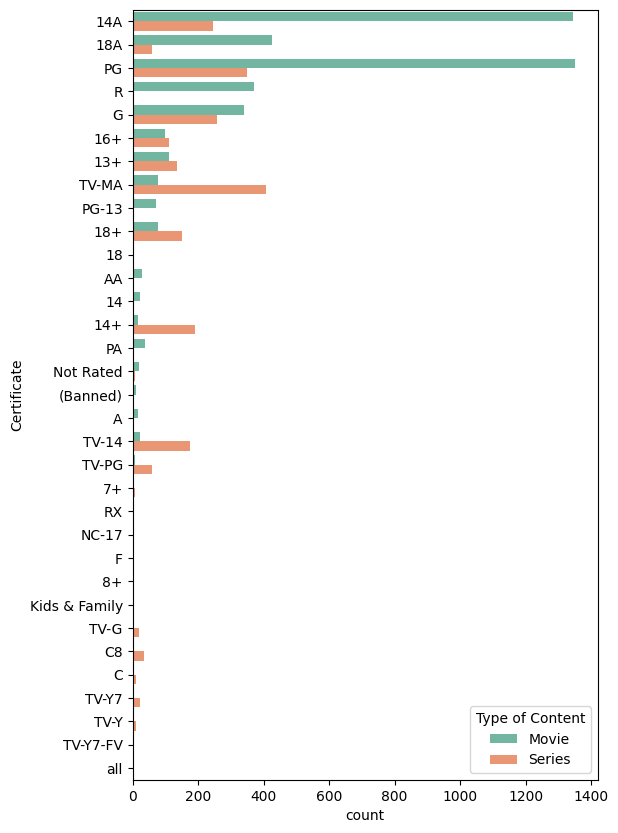

In [164]:
plt.figure(figsize=(6,10))
sns.countplot(data= X, y= 'Certificate', hue= 'Type of Content',  palette = "Set2")
plt.show()

Checking different genre for movie and series and comparing them

In [165]:
# Different genre of movies/series in our dataset

different_genre = X['Genre'].unique()
different_genre_set = []
for i in different_genre:
    temp = i.split(', ')
    different_genre_set.extend(temp)
different_genre_set = set(different_genre_set)
print(different_genre_set)
some_dictonary = {k:0 for k in different_genre_set}

{'Crime', 'Drama', 'Sci-Fi', 'Family', 'Film-Noir', 'Sport', 'Adult', 'Thriller', 'Documentary', 'History', 'Fantasy', 'Mystery', 'Reality-TV', 'Animation', 'Action', 'Short', 'News', 'Horror', 'Music', 'Talk-Show', 'Comedy', 'Biography', 'War', 'Western', 'Game-Show', 'Musical', 'Romance', 'Adventure'}


In [166]:
len(different_genre_set)

28

In [167]:
for i in list(different_genre_set):
    for j in X['Genre']:
        if i in j:
            some_dictonary[i] += 1

In [168]:
sum(list(some_dictonary.values()))

# This is more than double the total number of movies we have, so we can say in average a movie/series contains atleast 2 genre.

17389

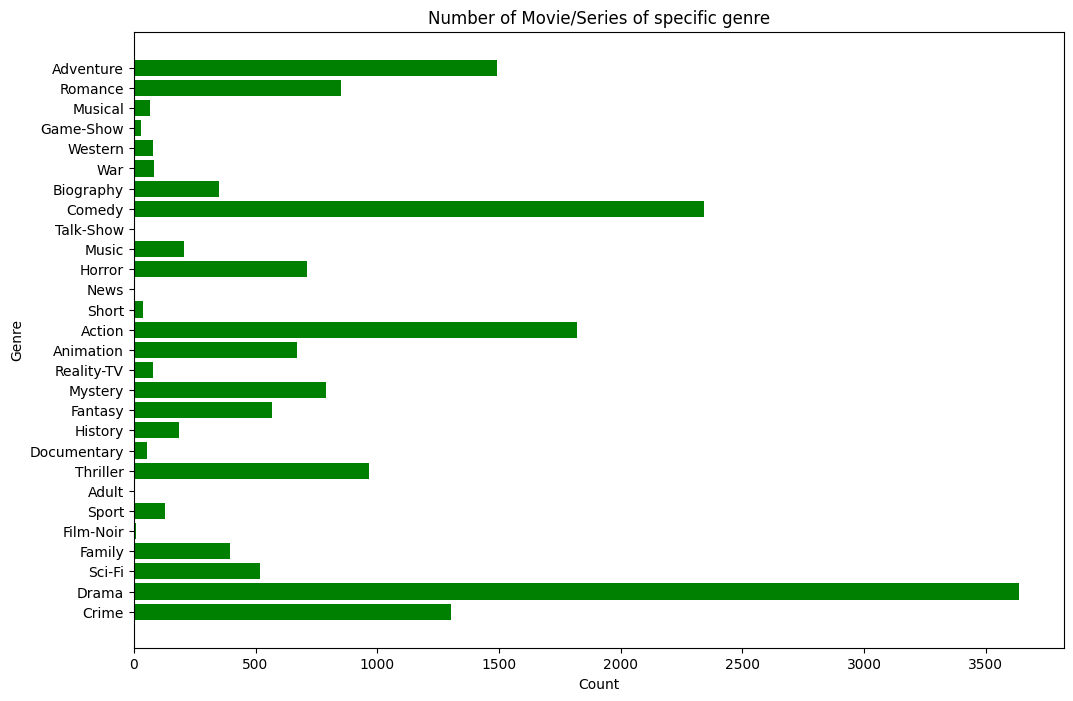

In [169]:
plt.figure(figsize=(12,8))
plt.barh(list(some_dictonary.keys()), list(some_dictonary.values()),  color='g')
plt.title("Number of Movie/Series of specific genre")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

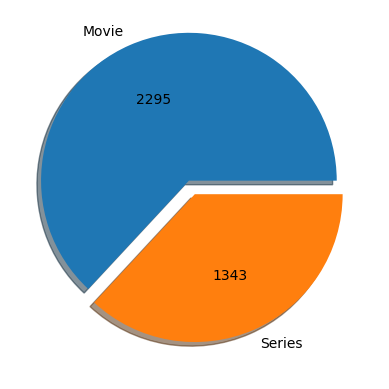

In [170]:
# In drama which is more movie or seires?

drama_group = X.loc[X['Genre'].str.contains("Drama")]
drama_group = drama_group.groupby('Type of Content')['Type of Content'].count()

plt.pie(drama_group, labels= drama_group.index, autopct= lambda x: f'{x*drama_group.sum()/100:.0f}', explode= [0.1, 0], shadow= True)
plt.show()

Average Rating based on Released Year

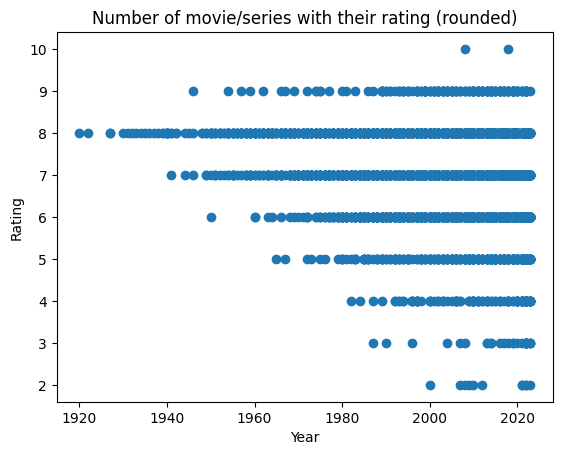

In [171]:
plt.scatter((X['Released']), [round(float(x)) for x in (X['Rating'])])
plt.title('Number of movie/series with their rating (rounded)')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Average Rating of movie and series

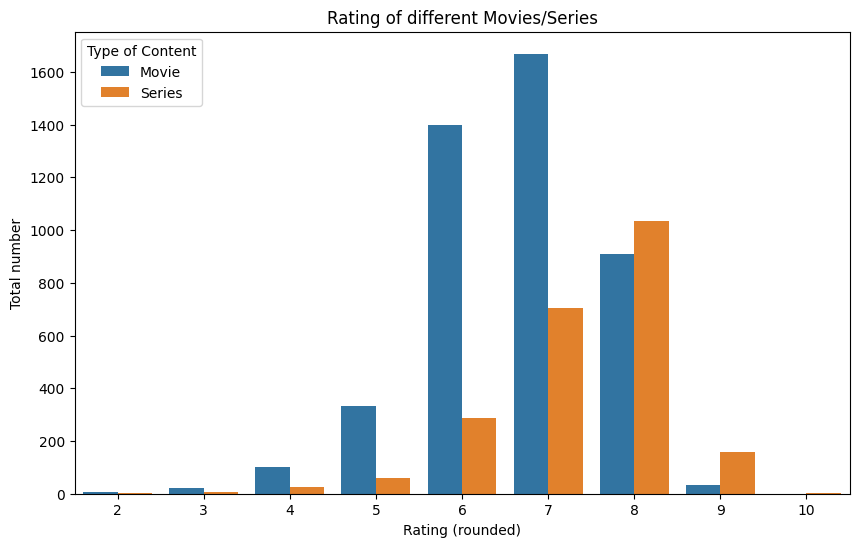

In [172]:
def convert(x):
    return round(float(x))

rating_group = X.copy()
rating_group['Rating'] = rating_group['Rating'].apply(convert)
rating_group = rating_group.groupby('Rating')['Type of Content'].value_counts().reset_index(name= 'count')

plt.figure(figsize=(10,6))
sns.barplot(data=rating_group, x='Rating', y='count', hue="Type of Content")
plt.ylabel("Total number")
plt.xlabel("Rating (rounded)")
plt.title('Rating of different Movies/Series')
plt.show()

Checking if there is any change in the runtime for movie and series now compared to 1900s

C:\Users\keera\AppData\Local\Temp\ipykernel_28628\2842355289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_release['Runtime'] = runtime_release['Runtime'].apply(change_runtime)


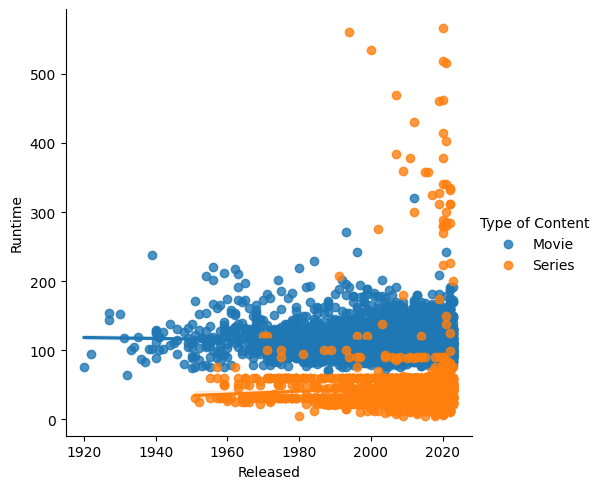

In [173]:
def change_runtime(x):
   return int((re.findall(r'\d+', x))[0])

runtime_release = X[['Released', 'Runtime', 'Type of Content']]
runtime_release['Runtime'] = runtime_release['Runtime'].apply(change_runtime)
sns.lmplot(data= runtime_release, x= 'Released', y= 'Runtime' , hue= 'Type of Content')
plt.show()

# Pandas Profiling (STEP 4)

In [174]:
from pandas_profiling import ProfileReport
prof = ProfileReport(X)
prof.to_file(output_file='output.html')

C:\Users\keera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
Summarize dataset:  71%|███████▏  | 15/21 [00:01<00:00, 18.49it/s, Calculate auto correlation]         C:\Users\keera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\keera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sc

# Encoding methods (STEP 5)

In [175]:
# We have already done some encoding above (changing Year column to Released and Finish with numerical values)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6754 entries, 0 to 7316
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Popularity Ranking  6754 non-null   int64 
 1   Name                6754 non-null   object
 2   Released            6754 non-null   int64 
 3   Finished            6754 non-null   object
 4   Certificate         6754 non-null   object
 5   Runtime             6754 non-null   object
 6   Genre               6754 non-null   object
 7   Rating              6754 non-null   object
 8   Summary             6754 non-null   object
 9   Director            4472 non-null   object
 10  Stars               6754 non-null   object
 11  Votes               6754 non-null   object
 12  Gross               3437 non-null   object
 13  Type of Content     6754 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


In [176]:
X.head() 

,Popularity Ranking,Name,Released,Finished,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Everything Everywhere All at Once,2022,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","400,779",$72.86M,Movie
1,2,Scream VI,2023,2023,14A,122 min,"Horror, Mystery, Thriller",7.2,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","33,036",NaN,Movie
2,3,The Whale,2022,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","109,463",NaN,Movie
3,4,Luther: The Fallen Sun,2023,2023,14A,129 min,"Crime, Drama, Mystery",6.4,Brilliant but disgraced detective John Luther ...,Jamie Payne,"Idris Elba, Cynthia Erivo, Andy Serkis, Dermot...","32,754",NaN,Movie
5,6,Cocaine Bear,2023,2023,18A,95 min,"Comedy, Thriller",6.1,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","39,288",NaN,Movie


In [177]:
# Lets convert Votes/Gross/Rating/Runtime into other Dtype first

def change_votes(x):
   return int(re.sub(r'\D' , '', x))

def change_runtime(x):
   return int((re.findall(r'\d+', x))[0])

def change_rating(x):
   return round(float(x))

def change_gross(x):
   try:
      return float((re.findall(r'\d+.\d+' , x))[0])
   except:
      return np.NaN
    

X['Votes'] = X['Votes'].apply(change_votes)
X['Gross'] = X['Gross'].apply(change_gross)
X['Runtime'] = X['Runtime'].apply(change_runtime)
X['Rating'] = X['Rating'].apply(change_rating)

X.rename(columns= {'Runtime' : 'Runtime (Minutes)', 'Gross' : 'Gross (M)'}, inplace= True)

X['Type of Content'].replace(['Movie', 'Series'], [0, 1], inplace=True)

C:\Users\keera\AppData\Local\Temp\ipykernel_28628\294469746.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Votes'] = X['Votes'].apply(change_votes)
C:\Users\keera\AppData\Local\Temp\ipykernel_28628\294469746.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gross'] = X['Gross'].apply(change_gross)
C:\Users\keera\AppData\Local\Temp\ipykernel_28628\294469746.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6754 entries, 0 to 7316
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity Ranking  6754 non-null   int64  
 1   Name                6754 non-null   object 
 2   Released            6754 non-null   int64  
 3   Finished            6754 non-null   object 
 4   Certificate         6754 non-null   object 
 5   Runtime (Minutes)   6754 non-null   int64  
 6   Genre               6754 non-null   object 
 7   Rating              6754 non-null   int64  
 8   Summary             6754 non-null   object 
 9   Director            4472 non-null   object 
 10  Stars               6754 non-null   object 
 11  Votes               6754 non-null   int64  
 12  Gross (M)           3437 non-null   float64
 13  Type of Content     6754 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.0+ MB


In [179]:
X[['Name', 'Finished', 'Certificate', 'Genre', 'Summary', 'Director', 'Stars']].nunique()

Name           6472
Finished         97
Certificate      33
Genre           435
Summary        6753
Director       2011
Stars          6722
dtype: int64

Since there are alot of unique values which will incerease the features in our dataset drastically, so we are not converting any more values to int/float. We can apply it on Certificate, but that will be extended on the project

# Checking outliers (STEP 6)

In [117]:
X.describe()

,Popularity Ranking,Released
count,6755.000000,6755.000000
mean,2222.645744,2006.920207
std,1431.393374,15.651350
min,1.000000,1920.000000
25%,962.000000,1999.000000
50%,2087.000000,2012.000000
75%,3415.500000,2019.000000
max,5000.000000,2023.000000


KeyError: 'Runtime (Minutes)'

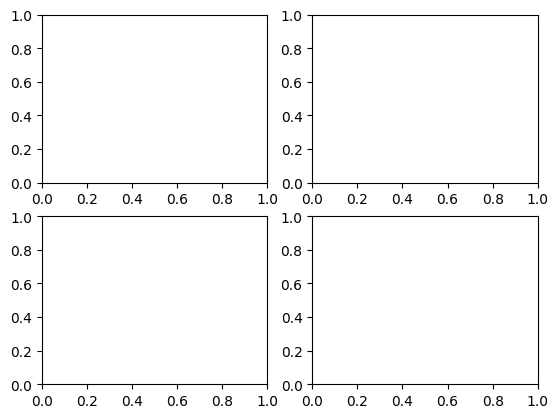

In [118]:
fig, ax = plt.subplots(2,2)
boxplot_data = X['Runtime (Minutes)'].values
rating_data = X['Rating'].values
votes_data = X['Votes'].values
runtime_data = X['Released'].values
ax[0,0].boxplot(boxplot_data)
ax[0,1].boxplot(rating_data)
ax[1,0].boxplot(votes_data)
ax[1,1].boxplot(runtime_data)
plt.show()

In [237]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR
print(IQR)

Popularity Ranking      2457.50
Released                  20.00
Runtime (Minutes)         61.00
Rating                     2.00
Votes                 128989.50
Gross (M)                 73.95
Type of Content            1.00
dtype: float64


In [238]:
(((X < LW) | (X > UW))).value_counts()

C:\Users\keera\AppData\Local\Temp\ipykernel_20872\4158904436.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (((X < LW) | (X > UW))).value_counts()


Certificate  Director  Finished  Genre  Gross (M)  Name   Popularity Ranking  Rating  Released  Runtime (Minutes)  Stars  Summary  Type of Content  Votes
False        False     False     False  False      False  False               False   False     False              False  False    False            False    5867
                                                                                                                                                    True      397
                                                                                      True      False              False  False    False            False     198
                                        True       False  False               False   False     False              False  False    False            True      175
                                                                                                                                                    False      52
                                    

# Addressing Outliers (STEP 7)

In [198]:
outliers_column_name = LW.index

### Now lets address outliers using Quantile-based Flooring and Capping first

In [239]:
dummy_db = X.copy()

In [240]:
floor_value = dummy_db.quantile(0.01)
ceiling_value = dummy_db.quantile(0.99)

In [ ]:
for i, j in zip(outliers_column_name, range(len(outliers_column_name))):
    
    dummy_db[i] = np.where(dummy_db[i] < floor_value[j], floor_value[j], dummy_db[i])
    dummy_db[i] = np.where(dummy_db[i] > ceiling_value[j], ceiling_value[j], dummy_db[i])

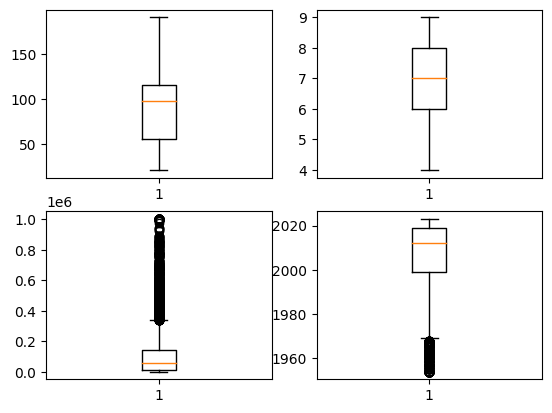

In [226]:
fig, ax = plt.subplots(2,2)
boxplot_data = dummy_db['Runtime (Minutes)'].values
rating_data = dummy_db['Rating'].values
votes_data = dummy_db['Votes'].values
runtime_data = dummy_db['Released'].values
ax[0,0].boxplot(boxplot_data)
ax[0,1].boxplot(rating_data)
ax[1,0].boxplot(votes_data)
ax[1,1].boxplot(runtime_data)
plt.show()

In [243]:
(((dummy_db < LW) | (dummy_db > UW))).value_counts()

C:\Users\keera\AppData\Local\Temp\ipykernel_20872\1515554613.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (((dummy_db < LW) | (dummy_db > UW))).value_counts()


Certificate  Director  Finished  Genre  Gross (M)  Name   Popularity Ranking  Rating  Released  Runtime (Minutes)  Stars  Summary  Type of Content  Votes
False        False     False     False  False      False  False               False   False     False              False  False    False            False    5921
                                                                                                                                                    True      400
                                                                                      True      False              False  False    False            False     203
                                        True       False  False               False   False     False              False  False    False            True      175
                                                                                                                                                    False      52
                                    

By converting .1% of our outliers we are only able to remove ~100 outliers 

### Trimming

In [244]:
# Now lets trim on the above dummy db

D_Q1 = dummy_db.quantile(0.25)
D_Q3 = dummy_db.quantile(0.75)
D_IQR = D_Q3 - D_Q1
D_LW = D_Q1 - 1.5*D_IQR
D_UW = D_Q3 + 1.5*D_IQR
print(D_IQR)

Popularity Ranking      2457.50
Released                  20.00
Runtime (Minutes)         61.00
Rating                     2.00
Votes                 128989.50
Gross (M)                 73.95
Type of Content            1.00
dtype: float64


In [252]:
index = []
for i, j in zip(outliers_column_name, range(len(outliers_column_name))):
    index.extend(dummy_db[(dummy_db[i] >= D_UW[j]) | (dummy_db[i] <= D_LW[j])].index)

len((index))

1046

In [253]:
# There might be some index which have 2 outliers so they are appearing twice, lets first handle this

index = list(set(index))
len(index)

859

In [254]:
dummy_db.drop(index, inplace= True)

In [257]:
print(X.shape)
print(dummy_db.shape)

(6763, 14)
(5904, 14)


### Log Transformation

In [258]:
dummy_db = X.copy()

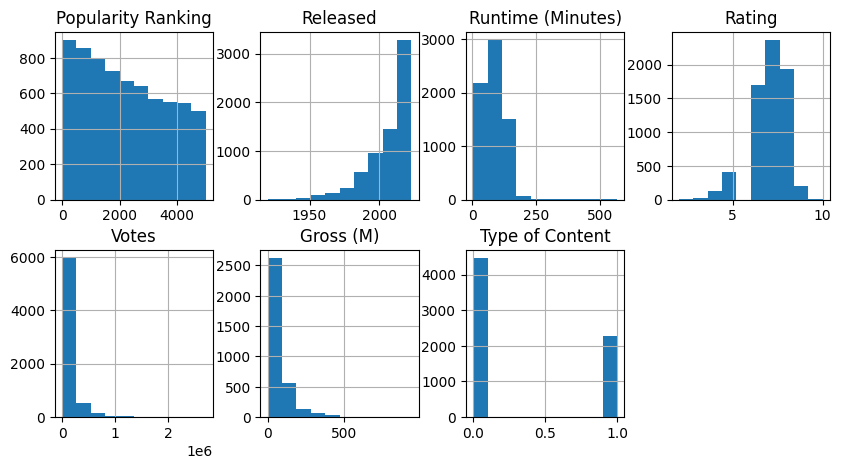

In [268]:
dummy_db.hist(bins= 10, layout= (2, 4), figsize= (10,5))
plt.show()

In [270]:
dummy_db.skew()

C:\Users\keera\AppData\Local\Temp\ipykernel_20872\755786058.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dummy_db.skew()


Popularity Ranking    0.245950
Released             -1.534668
Runtime (Minutes)     1.725246
Rating               -0.603475
Votes                 4.382128
Gross (M)             3.222317
Type of Content       0.684327
dtype: float64

In [271]:
for i in outliers_column_name:
    dummy_db[i] = dummy_db[i].map(lambda x: np.log(x) if x > 0 else 0)
dummy_db.skew()

C:\Users\keera\AppData\Local\Temp\ipykernel_20872\1091718876.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dummy_db.skew()


Popularity Ranking   -1.688582
Released             -1.562210
Runtime (Minutes)    -0.992233
Rating               -1.475190
Votes                -0.599974
Gross (M)             0.361894
Type of Content       0.000000
dtype: float64

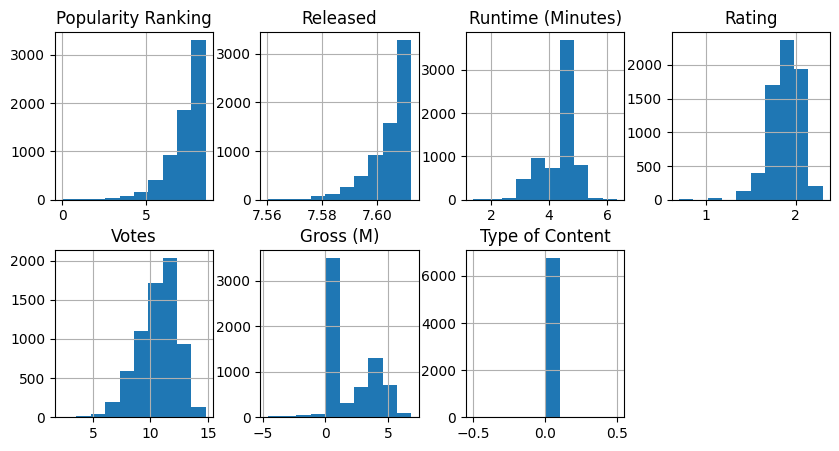

In [272]:
dummy_db.hist(bins= 10, layout= (2, 4), figsize= (10,5))
plt.show()

After seeing the data columns above and data; we will not remove outliers since those data does make sense in our data

# Unsupervised Learning K-Means (STEP 8)

In [53]:
from sklearn.cluster import KMeans

In [54]:
# Not using float64 as it contains NaN values

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 7302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity Ranking  6763 non-null   int64  
 1   Name                6763 non-null   object 
 2   Released            6763 non-null   int64  
 3   Finished            6763 non-null   object 
 4   Certificate         6763 non-null   object 
 5   Runtime (Minutes)   6763 non-null   int64  
 6   Genre               6763 non-null   object 
 7   Rating              6763 non-null   int64  
 8   Summary             6763 non-null   object 
 9   Director            4476 non-null   object 
 10  Stars               6762 non-null   object 
 11  Votes               6763 non-null   int64  
 12  Gross (M)           3436 non-null   float64
 13  Type of Content     6763 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 792.5+ KB


In [128]:
data = X.select_dtypes(include= ['int64'])

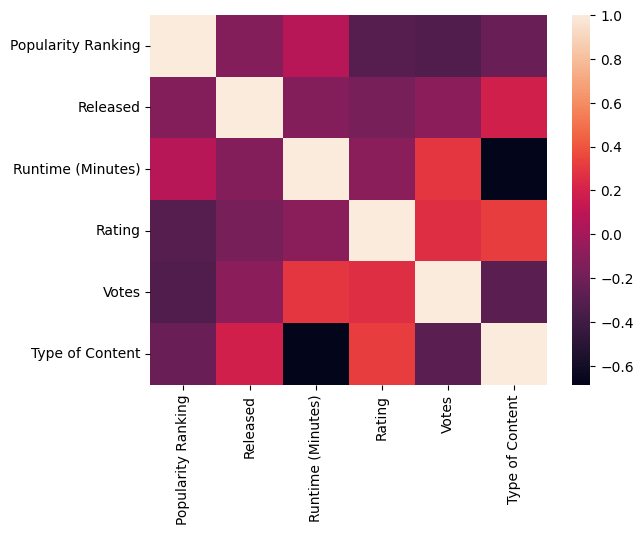

In [129]:
corr = data.corr()
sns.heatmap(corr)
plt.show()

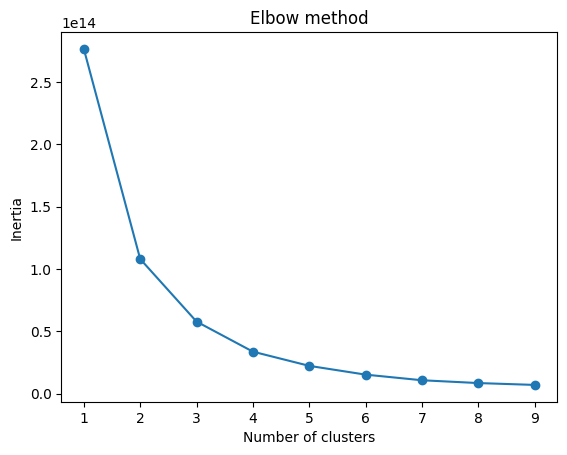

In [130]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [131]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(data)
data['Group'] = kmeans.labels_.astype(int)

In [132]:
data['Group'].value_counts()

0    5072
2    1308
1     331
3      52
Name: Group, dtype: int64

In [133]:
data.head(5)

,Popularity Ranking,Released,Runtime (Minutes),Rating,Votes,Type of Content,Group
0,1,2023,122,7,20665,0,0
1,2,2023,116,7,21205,0,0
2,3,2022,139,8,371173,0,2
3,4,2023,95,6,22380,0,0
4,5,2022,117,8,89630,0,0


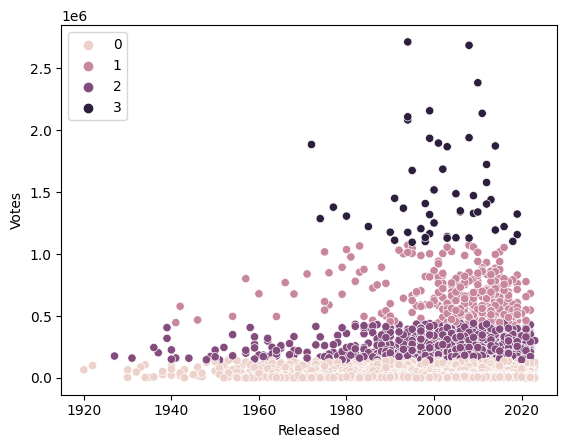

In [134]:
sns.scatterplot(data= data, y= 'Votes', x= 'Released', hue= 'Group')
plt.legend(loc='upper left')
plt.show()

# Some NLP Techniques (STEP 9)

In [155]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

#### Tokenizing

In [143]:
# Tokenizing
X['Tokenized_Word'] = X['Summary'].apply(lambda x: word_tokenize(x))

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\689665636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Tokenized_Word'] = X['Summary'].apply(lambda x: word_tokenize(x))


####  Removing Stopwords and punctuations

In [172]:
nltk.download('stopwords')
stopword = stopwords.words('english')
punctuation = list(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
#  Removing Stopwords and punctuations

def clean(x):
    token = []
    for i in x:
        if (i not in stopword) and (i not in punctuation):
            token.append(i)
    return token

X['Cleaned_Token'] = X['Tokenized_Word'].apply(lambda x: clean(x))

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\1023688729.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cleaned_Token'] = X['Tokenized_Word'].apply(lambda x: clean(x))


#### Stemming

In [175]:
def stemming(x):
    return [porter.stem(z) for z in x]

porter = PorterStemmer()
X['Stem_Token'] = X['Cleaned_Token'].apply(lambda x: stemming(x))

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\1870536170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Stem_Token'] = X['Cleaned_Token'].apply(lambda x: stemming(x))


#### Lemmatization

In [178]:
def lemmatization(x):
    return [lem.lemmatize(z, pos='a') for z in x]

lem = WordNetLemmatizer()
X['Lem_Token'] = X['Cleaned_Token'].apply(lambda x: lemmatization(x))

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\1065949274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Lem_Token'] = X['Cleaned_Token'].apply(lambda x: lemmatization(x))


In [185]:
X[['Tokenized_Word', 'Cleaned_Token', 'Stem_Token', 'Lem_Token']].head(5)

,Tokenized_Word,Cleaned_Token,Stem_Token,Lem_Token
0,"[In, the, next, installment, ,, the, survivors...","[In, next, installment, survivors, Ghostface, ...","[in, next, instal, survivor, ghostfac, kill, l...","[In, next, installment, survivors, Ghostface, ..."
1,"[Adonis, has, been, thriving, in, both, his, c...","[Adonis, thriving, career, family, life, child...","[adoni, thrive, career, famili, life, childhoo...","[Adonis, thriving, career, family, life, child..."
2,"[A, middle-aged, Chinese, immigrant, is, swept...","[A, middle-aged, Chinese, immigrant, swept, in...","[a, middle-ag, chines, immigr, swept, insan, a...","[A, middle-aged, Chinese, immigrant, swept, in..."
3,"[An, oddball, group, of, cops, ,, criminals, ,...","[An, oddball, group, cops, criminals, tourists...","[an, oddbal, group, cop, crimin, tourist, teen...","[An, oddball, group, cops, criminals, tourists..."
4,"[A, reclusive, ,, morbidly, obese, English, te...","[A, reclusive, morbidly, obese, English, teach...","[a, reclus, morbidli, obes, english, teacher, ...","[A, reclusive, morbidly, obese, English, teach..."
